## <font style="background-color:DodgerBlue" color="White">Test On using smaller N to predict larger N</font>

In [9]:
include("setup.jl")
using Plots

In [6]:
N = 4
w_r = zeros(5,N)
b_r = zeros(5,N)
Loss_r = zeros(5,1)
times = Float64[]

for i in 1:5
    r = 10.0 ^ (-(i+1))
    if i == 1
        timed_result = @timed Model_run(N,r,rand(N),rand(N))
        w_r[i,:], b_r[i,:], Loss_r[i,1]= timed_result[1]
        push!(times, timed_result[2])
    else
        timed_result = @timed Model_run(N,r,w_r[i-1,:],b_r[i-1,:])
        w_r[i,:], b_r[i,:], Loss_r[i,1] = timed_result[1]
        push!(times, timed_result[2])
    end
    println("Time to train: ", timed_result[2])
end

 Reg = 0.010000000000000002  Resid = 1.3162214373974024e-16  Loss = 0.019731745793642865 
Time to train: 1.3072279
 Reg = 0.001  Resid = 8.041688897165306e-8  Loss = 0.0063875028507720776 
Time to train: 1.9004316
 Reg = 0.0001  Resid = 3.1727240420834123e-6  Loss = 0.0008285834678933606 
Time to train: 2.8748422
 Reg = 1.0e-5  Resid = 8.935954496667802e-6  Loss = 0.00011999659050724085 
Time to train: 4.8006475
 Reg = 1.0e-6  Resid = 9.307593735313963e-6  Loss = 2.9511801454322032e-5 
Time to train: 5.7383128


In [7]:
param_node = param()
param_node.r = r = 10.0 ^ (-(6))
param_node.N = 4
theta_node = theta(w_r[5,:],b_r[5,:],1,1)

h = 2/param_node.Q
k = 1/param_node.N
x = (-1 .+ (1:param_node.Q) .* h .- h / 2)'

y_exact = x + (1 .-x.^2)./3
#y_exact = x + (1 .+ x.^2)./3

fhat, z, dzn, dzw, dzb = forward(param_node,x,theta_node)
print(fhat)

[-0.9623135289662013, -0.9161978367977076, -0.8695327769603158, -0.8224258123628472, -0.7749984163556936, -0.7273826692765685, -0.6797171418633506, -0.6321423323690101, -0.5847959776767435, -0.5378085745666402, -0.49129942262659926, -0.4453734395734958, -0.4001189136307328, -0.3556062604035186, -0.3118877580916938, -0.2689981569987413, -0.22695600476783284, -0.18576550017790788, -0.14541868380921202, -0.1058977885318792, -0.0671776002416555, -0.029227713209968337, 0.007985400548893046, 0.044496556276599375, 0.08034027719789716, 0.11554947154322329, 0.150154351895877, 0.18418157400300775, 0.21765356801450725, 0.2505880346303805, 0.2829975808859007, 0.31488947446986654, 0.34626550091034136, 0.37712191418980656, 0.4074494780085198, 0.43723360171986636, 0.4664545816576055, 0.4950879648732893, 0.5231050578274931, 0.5504736068206593, 0.5771586792275475, 0.6031237740504996, 0.6283321859128936, 0.6527486372868521, 0.6763411784908255, 0.699083333145877, 0.7209564383619815, 0.741952095015691, 0.

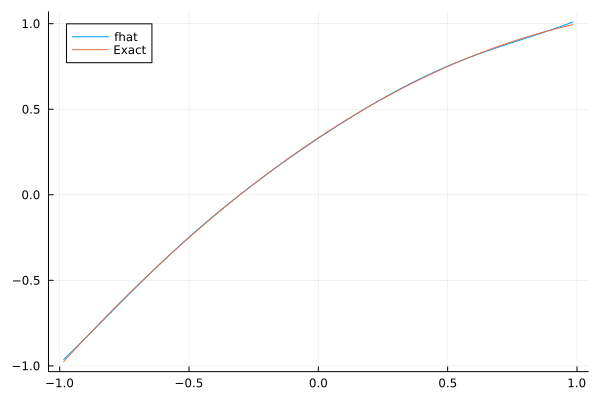

In [10]:
plot(x',fhat, label="fhat")
plot!(x',y_exact', label="Exact")

In [12]:
Loss_r

5×1 Matrix{Float64}:
 0.019731745793642865
 0.0063875028507720776
 0.0008285834678933606
 0.00011999659050724085
 2.9511801454322032e-5

In [18]:
function CreateX(vec1, target_N)

    vec2 = zeros(target_N)

    for i in 1:length(vec1)
        # Set the current value
        vec2[2i - 1] = vec1[i]
        # Check if not at the end to interpolate
        if i < length(vec1)
            # Linear interpolation and set the next value
            vec2[2i] = (vec1[i] + vec1[i+1]) / 2
        end
    end

    vec2[end] = vec1[end]

    return vec2

end

CreateX (generic function with 1 method)

In [19]:
function CreateVec(vec1, x, target_x)

    vec2 = zeros(length(target_x))

    for i in 1:length(vec1)
        # Set the current value
        vec2[2i - 1] = vec1[i]
        # Check if not at the end to interpolate
        if i < length(vec1)
            # Linear interpolation and set the next value
            vec2[2i] = vec1[i] + ((target_x[2i] - x[i]) * (vec1[i+1] - vec1[i] ) / (x[i+1] - x[i]))
        end
    end

    vec2[end] = vec1[end]

    return vec2
end

CreateVec (generic function with 1 method)

### N = 4 -> N = 7

In [20]:
N = 7
w_r_7 = zeros(5,N)
b_r_7 = zeros(5,N)
Loss_r_7 = zeros(5,1)
x1 = LinRange(0, 1, 4)
x_7 = CreateX(x1, 7)

times_7 = Float64[]

for i in 1:5
    r = 10.0 ^ (-(i+1))
    init_w = CreateVec(w_r[i,:], x1, x_7)
    init_b = CreateVec(b_r[i,:], x1, x_7)
    
    timed_result = @timed Model_run(N,r,init_w,init_b)
    w_r_7[i,:], b_r_7[i,:], Loss_r_7[i,1]  = timed_result[1]

    push!(times_7, timed_result[2])
    println("Time to train: ", timed_result[2])
end

 Reg = 0.010000000000000002  Resid = 2.6828582758153807e-16  Loss = 0.019731766406084584 
Time to train: 1.8077084
 Reg = 0.001  Resid = 5.1557157124400115e-6  Loss = 0.007087702114131509 
Time to train: 1.5446556
 Reg = 0.0001  Resid = 5.273529303778489e-6  Loss = 0.0008309125761809642 
Time to train: 6.2024172
 Reg = 1.0e-5  Resid = 9.26081708032958e-6  Loss = 0.0001532127267498006 
Time to train: 16.9897375
 Reg = 1.0e-6  Resid = 9.612385452359294e-6  Loss = 2.1406101589370425e-5 
Time to train: 23.0128739


#### <font color="Green">Plot of w vs tau </font>

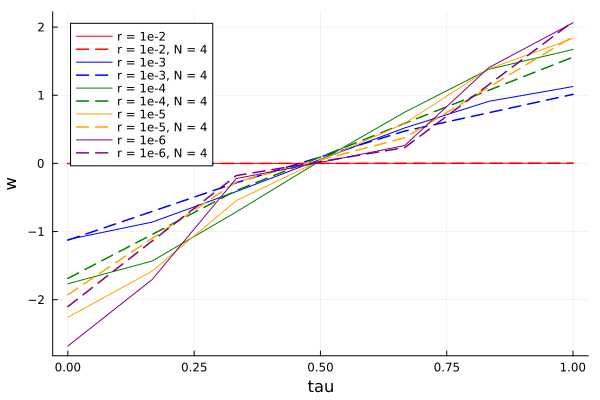

In [21]:
plt = plot() 
colors = [:red, :blue, :green, :orange, :purple]
for i in 1:5
    plot!(x_7,w_r_7[i,:],label="r = 1e-$(i+1)", color=colors[i])
    plot!(x1,w_r[i,:],label="r = 1e-$(i+1), N = 4", linestyle=:dash, color=colors[i],linewidth = 1.5)
end

xlabel!(plt, "tau")
ylabel!(plt, "w")

display(plt)

#savefig(plt, "figs/Ntest_N7_wplot.png")

In [26]:
param_node = param()
param_node.r = 10.0 ^ (-(6))
param_node.N = 7
theta_node = theta(w_r_7[5,:],b_r_7[5,:],1,1)

h = 2/param_node.Q
k = 1/param_node.N
x = (-1 .+ (1:param_node.Q) .* h .- h / 2)'

y_exact = x + (1 .-x.^2)./3
#y_exact = x + (1 .-x.^4)./3

fhat, z, dzn, dzw, dzb = forward(param_node,x,theta_node)


([-0.9634220163090148, -0.917053690271094, -0.8701204438387308, -0.8227423856144263, -0.7750567270811168, -0.7272125992031744, -0.679364757071325, -0.6316667784433126, -0.5842644541815509, -0.5372900379924043  …  0.8676016986452233, 0.8834470187106032, 0.8989528594143588, 0.9142469445760173, 0.9294671673113144, 0.9447557637982242, 0.9602529160938259, 0.9760905425684336, 0.9923869854218506, 1.0092431149769807], [-0.984375 -0.8415361524346825 … -0.9200710386807679 -0.9634220163090148; -0.953125 -0.8102894886663631 … -0.8836574048173638 -0.917053690271094; … ; 0.953125 0.9031696377382082 … 0.8498887286894328 0.9923869854218506; 0.984375 0.9242391142553349 … 0.8667208006860783 1.0092431149769807], [0.9999019320407395 0.995874987405265 … 1.1689863439738188 1.2676586359409594; 0.9998840502456108 0.995415434512809 … 1.1746825010400588 1.278694933110233; … ; 0.6639198312740888 0.770680616855095 … 1.0209297455602322 1.001479365263264; 0.6849482470984822 0.774914005922007 … 1.0200299396159211 1.

In [49]:
param_node = param()
param_node.r = 10.0 ^ (-(6))
param_node.N = 7
param_node.Q = 30
theta_node = theta(w_r_7[5,:],b_r_7[5,:],1,1)

h = 2/param_node.Q
k = 1/param_node.N
x = (-1 .+ (1:param_node.Q) .* h .- h / 2)'

y_exact = x + (1 .-x.^2)./3
#y_exact = x + (1 .-x.^4)./3

fhat, z, dzn, dzw, dzb = forward(param_node,x,theta_node)


L_main = h*sum((fhat' - y_exact).^2)

1×30 Matrix{Float64}:
 0.00759249  -0.00032796  -0.0037096  …  -0.00317851  0.00162943  0.0110988

### N = 7 -> N = 13

In [31]:
N = 13
w_r_13 = zeros(5,N)
b_r_13 = zeros(5,N)
Loss_r_13 = zeros(5,1)
x_13 = CreateX(x_7, 13)

times_13 = Float64[]

for i in 1:5
    r = 10.0 ^ (-(i+1))
    init_w = CreateVec(w_r[i,:], x_7, x_13)
    init_b = CreateVec(b_r[i,:], x_7, x_13)
    
    timed_result = @timed Model_run(N,r,init_w,init_b)
    w_r_13[i,:], b_r_13[i,:], Loss_r_13[i,1] = timed_result[1]

    push!(times_13, timed_result[2])
    println("Time to train: ", timed_result[2])
end

 Reg = 0.010000000000000002  Resid = 1.629756873143648e-10  Loss = 0.01973177933401862 
Time to train: 2.6735607
 Reg = 0.001  Resid = 2.3423069318293573e-6  Loss = 0.00731441472385168 
Time to train: 8.1054337
 Reg = 0.0001  Resid = 6.7470263357758266e-6  Loss = 0.0008750475760929426 
Time to train: 28.5221217
 Reg = 1.0e-5  Resid = 9.069863635724497e-6  Loss = 0.00016371983061520034 
Time to train: 175.0106719
 Reg = 1.0e-6  Resid = 9.750718160818721e-6  Loss = 3.5148018861360935e-5 
Time to train: 176.0292668


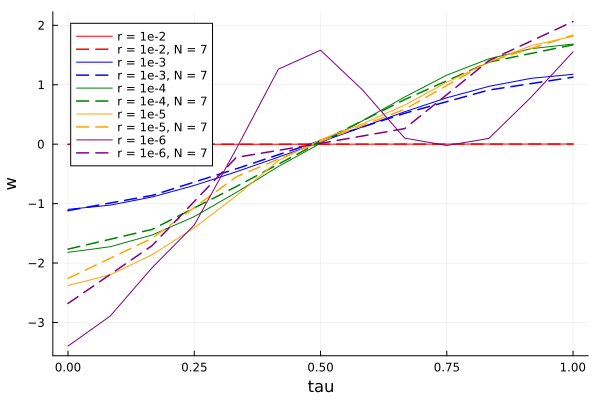

In [32]:
plt = plot() 
colors = [:red, :blue, :green, :orange, :purple]

for i in 1:5
    plot!(x_13,w_r_13[i,:],label="r = 1e-$(i+1)", color=colors[i])
    plot!(x_7,w_r_7[i,:],label="r = 1e-$(i+1), N = 7", linestyle=:dash, color=colors[i],linewidth = 1.5)
end

xlabel!(plt, "tau")
ylabel!(plt, "w")

display(plt)

#savefig(plt, "figs/Ntest_N7_wplot.png")

In [37]:
param_node = param()
param_node.r = r = 10.0 ^ (-(6))
param_node.N = 13
theta_node = theta(w_r_13[5,:],b_r_13[5,:],1,1)

h = 2/param_node.Q
k = 1/param_node.N
x = (-1 .+ (1:param_node.Q) .* h .- h / 2)'

y_exact = x + (1 .-x.^2)./3
#y_exact = x + (1 .-x.^4)./3

fhat, z, dzn, dzw, dzb = forward(param_node,x,theta_node)

([-0.9601091053819479, -0.9137992797726555, -0.8671603330066833, -0.8202742111085121, -0.77323135164341, -0.7261283927806511, -0.6790654442462721, -0.6321431163482982, -0.585459537674993, -0.5391075936035307  …  0.8665732028743708, 0.8824567587075353, 0.8980725358209372, 0.9135711045164937, 0.929115406521865, 0.9448730659481561, 0.9610077591547399, 0.9776709162612732, 0.9949948721457211, 1.0130881300650127], [-0.984375 -0.9074527188791637 … -0.9340923807760669 -0.9601091053819479; -0.953125 -0.8762029070789954 … -0.8923012894738488 -0.9137992797726555; … ; 0.953125 0.9179062340641426 … 0.9190442990459406 0.9949948721457211; 0.984375 0.9430241397586346 … 0.9370848275706364 1.0130881300650127], [0.9999945942130468 0.9999498839023413 … 1.0505784534935392 1.1059029502858597; 0.9999933158028644 0.9999399517201708 … 1.051842013071587 1.1102420305896288; … ; 0.7935009726165183 0.8079733779732274 … 1.027094929114351 1.0030045311146762; 0.8142326634348372 0.8188499375694288 … 1.0265404150839976

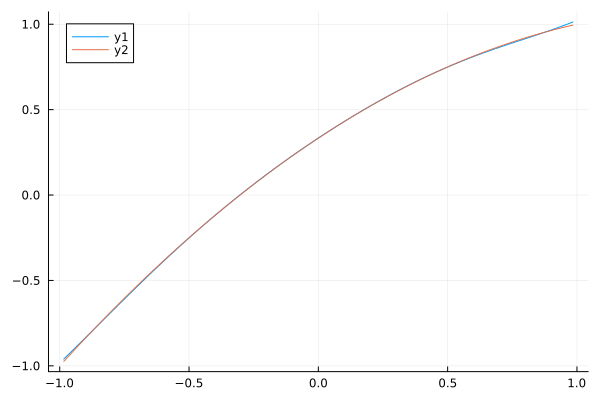

In [38]:
plot(x',fhat)
plot!(x',y_exact')

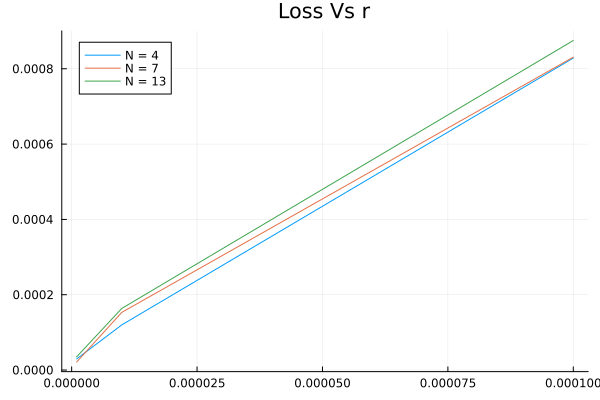

In [44]:
# Plot of Loss vs r
r = [10.0^(-4), 10.0^(-5), 10.0^(-6)]
plot(r,Loss_r[3:5],label = "N = 4", title="Loss Vs r")
plot!(r,Loss_r_7[3:5],label = "N = 7")
plot!(r,Loss_r_13[3:5],label = "N = 13")


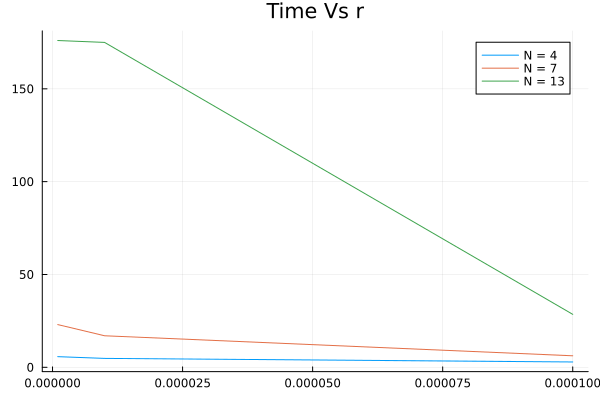

In [45]:
plot(r,times[3:5],label = "N = 4", title="Time Vs r")
plot!(r,times_7[3:5],label = "N = 7")
plot!(r,times_13[3:5],label = "N = 13")